In [ ]:
# Taller

# 1
Del conjunto de datos de Temperatura, realice la selección de una provincia y realice la estimación de la densidad. Para esta estimación considere:

### a. Tabla de frecuencias

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

In [4]:
df = pd.read_excel("data\\Temperaturas.xlsx", sheet_name = 'Hoja3')

In [5]:
df.head(2)

,ano1,mes2,dia3,fecha4,alava5,albacete6,alicante7,almeria8,avila9,badajoz10,...,sevilla47,soria48,tarragona49,teruel50,toledo51,valladolid52,valencia53,vizcaya54,zamora55,zaragoza56
0,1990,1,1,1990-01-01,25,22,14,15,29,19,...,18,29,20,23,25,27,18,20,25,26
1,1990,1,2,1990-01-02,26,25,14,14,33,21,...,20,30,16,23,27,29,17,18,31,22


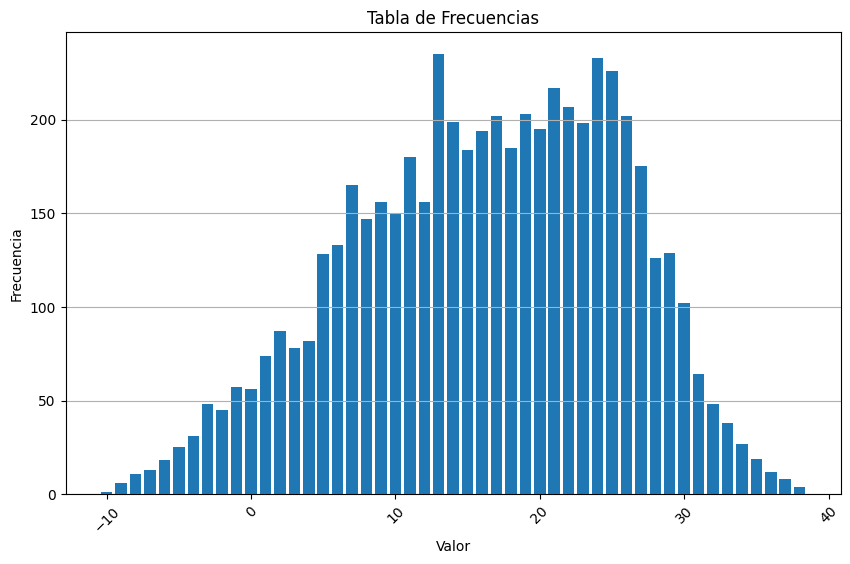

In [17]:
tabla_frecuencias = df['alava5'].value_counts()

# Convertir la serie de frecuencias en un DataFrame para facilitar el trazado
tabla_frecuencias_df = tabla_frecuencias.reset_index()
tabla_frecuencias_df.columns = ['Valor', 'Frecuencia']

# Trazar el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.bar(tabla_frecuencias_df['Valor'], tabla_frecuencias_df['Frecuencia'])
plt.xlabel('Valor') 
plt.ylabel('Frecuencia')  
plt.title('Tabla de Frecuencias')  
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si es necesario
plt.grid(axis='y')  # Mostrar rejilla solo en el eje y
plt.show()

In [18]:
tabla_frecuencias_df = tabla_frecuencias.reset_index()
tabla_frecuencias_df.columns = ['Valor', 'Frecuencia']

In [19]:
tabla_frecuencias_df

,Valor,Frecuencia
0,13,235
1,24,233
2,25,226
3,21,217
4,22,207
5,19,203
6,17,202
7,26,202
8,14,199
9,23,198


### b Estimación utilizando al menos 2 Kernels. Al variar el ancho de banda, ¿qué puede concluir de su efecto al estimar la densidad?

In [20]:
from sklearn.neighbors import KernelDensity

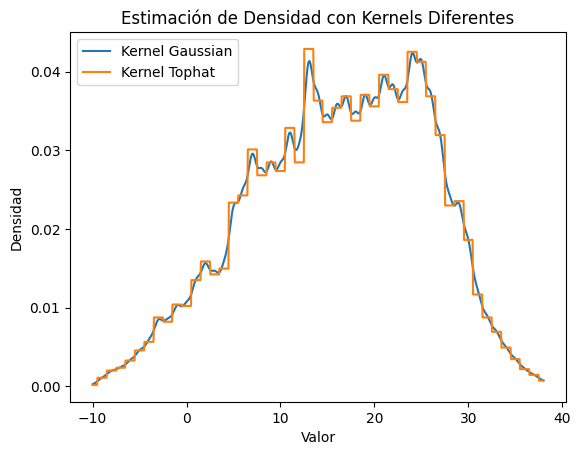

In [23]:
data = df['alava5'].values

x = np.linspace(data.min(), data.max(), 1000)

kernels = ['gaussian', 'tophat']
for kernel in kernels:
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(data[:, None])
    log_dens = kde.score_samples(x[:, None])
    plt.plot(x, np.exp(log_dens), label=f'Kernel {kernel.capitalize()}')

plt.title('Estimación de Densidad con Kernels Diferentes')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.show()

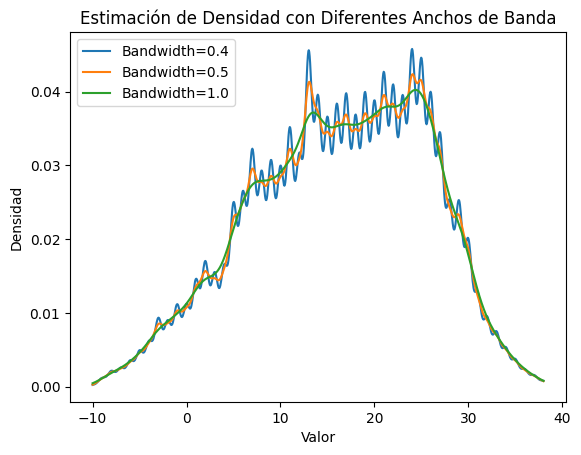

In [26]:
bandwidths = [0.4, 0.5, 1.0]

# Estimar la densidad utilizando Kernel Density Estimation (KDE) con diferentes valores de bandwidth
for bandwidth in bandwidths:
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(data[:, None])
    log_dens = kde.score_samples(x[:, None])
    plt.plot(x, np.exp(log_dens), label=f'Bandwidth={bandwidth}')

# Visualización
plt.title('Estimación de Densidad con Diferentes Anchos de Banda')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.show()

El efecto del ancho de banda (bandwidth) en la estimación de densidad utilizando Kernel Density Estimation (KDE) es crucial y puede tener un impacto significativo en la forma y suavidad de la función de densidad estimada. Aquí hay algunas conclusiones generales sobre el efecto del ancho de banda:

1. Subajuste (Underfitting): Cuando el ancho de banda es demasiado pequeño, la estimación de densidad tiende a ser demasiado rugosa y se ajusta excesivamente a las fluctuaciones en los datos. Esto puede resultar en una pérdida de información sobre la verdadera forma de la distribución subyacente, especialmente en presencia de ruido.
2. Sobreajuste (Overfitting): Por otro lado, cuando el ancho de banda es demasiado grande, la estimación de densidad tiende a ser demasiado suave y puede perder detalles importantes de la distribución subyacente. Esto puede llevar a una simplificación excesiva de la distribución y la suavización de picos y valles que son relevantes para comprender la estructura de los datos.
3. Optimización del ancho de banda: En la práctica, seleccionar el ancho de banda óptimo es un proceso importante y puede variar dependiendo del conjunto de datos y del objetivo del análisis. A menudo, se utilizan métodos de validación cruzada u otras técnicas de selección de modelos para determinar el ancho de banda que mejor se adapte a los datos.
4. Interpretación visual: Visualizar la estimación de densidad con diferentes valores de ancho de banda en un mismo gráfico puede proporcionar información útil sobre cómo varía la suavidad y la forma de la distribución estimada en función del ancho de banda. Esto puede ayudar a comprender mejor la estructura de los datos y a tomar decisiones informadas sobre la selección del ancho de banda en análisis posteriores.
En resumen, el ancho de banda en la estimación de densidad es un parámetro importante que afecta la suavidad y la forma de la función de densidad estimada, y su selección adecuada es fundamental para obtener resultados precisos e interpretables.